In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data next


In [2]:
#Read the City data
city_pd = pd.read_csv(city_data_to_load, encoding="utf-8")

#print observations to get an idea of the dataframe
city_pd.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
#Ride data
ride_pd = pd.read_csv(ride_data_to_load, encoding="utf-8")

#print observations to get an idea of the dataframe
ride_pd.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
#We want to know....

#Average Fare ($) Per City
#Total Number of Rides Per City
#Total Number of Drivers Per City
#City Type (Urban, Suburban, Rural)

In [5]:
# Combine the data into a single dataset
# Merge data by city. Since we want to see all city data, use outer join since both datasets might not match completely by city.
mergecityride_table_pd = pd.merge(city_pd, ride_pd, on="city", how="outer")

#print first few observations of new dataframe
mergecityride_table_pd.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [6]:
# Obtain the x and y coordinates for each of the three city types

mergecityride1_table_pd = mergecityride_table_pd.groupby(['city','type'], as_index=False)
print(mergecityride1_table_pd)


In [7]:
Total_fare_pd = mergecityride1_table_pd["fare"].mean()
Total_fare_pd.head()
#Total_fare = mergecityride1_table_pd.groupby['city'].fare.sum()
#Total_fare.head()

,city,type,fare
0,Amandaburgh,Urban,24.641667
1,Barajasview,Urban,25.332273
2,Barronchester,Suburban,36.422500
3,Bethanyland,Suburban,32.956111
4,Bradshawfurt,Rural,40.064000


In [8]:
Total_rides_pd = mergecityride1_table_pd["ride_id"].count()
Total_rides_pd.head()


,city,type,ride_id
0,Amandaburgh,Urban,18
1,Barajasview,Urban,22
2,Barronchester,Suburban,16
3,Bethanyland,Suburban,18
4,Bradshawfurt,Rural,10


In [9]:
Total_drivers_pd = mergecityride1_table_pd["driver_count"].mean()
Total_drivers_pd.head()

,city,type,driver_count
0,Amandaburgh,Urban,12
1,Barajasview,Urban,26
2,Barronchester,Suburban,11
3,Bethanyland,Suburban,22
4,Bradshawfurt,Rural,7


In [10]:
#combine groupby statistics into a dictionary to create a dataframe

#drivingstat_table_pd = ({"Average Fare": Total_fare,
                         #"Total rides": Total_rides,
                        #"Total drivers": Total_drivers})

#print once to check that everything worked then comment out due to space     

#drivingstat_table_pd

#merge these dataframes

mergeridefare_pd = pd.merge(Total_fare_pd, Total_rides_pd, on=("city","type"), how="outer")
mergedriverridefare_pd = pd.merge(mergeridefare_pd, Total_drivers_pd, on=("city","type"), how="outer")
#mergeridefare_pd
mergedriverridefare_pd.head()

,city,type,fare,ride_id,driver_count
0,Amandaburgh,Urban,24.641667,18,12
1,Barajasview,Urban,25.332273,22,26
2,Barronchester,Suburban,36.422500,16,11
3,Bethanyland,Suburban,32.956111,18,22
4,Bradshawfurt,Rural,40.064000,10,7


In [11]:
pdrural = mergedriverridefare_pd[mergedriverridefare_pd['type'].isin(['Rural'])]
pdrural.head()

,city,type,fare,ride_id,driver_count
4,Bradshawfurt,Rural,40.064000,10,7
17,Garzaport,Rural,24.123333,3,7
20,Harringtonfort,Rural,33.470000,6,4
24,Jessicaport,Rural,36.013333,6,1
33,Lake Jamie,Rural,34.358333,6,4


In [12]:
pdurban = mergedriverridefare_pd[mergedriverridefare_pd['type'].isin(['Urban'])]
pdurban.head()

,city,type,fare,ride_id,driver_count
0,Amandaburgh,Urban,24.641667,18,12
1,Barajasview,Urban,25.332273,22,26
6,Carriemouth,Urban,28.314444,27,52
7,Christopherfurt,Urban,24.501852,27,41
10,Deanville,Urban,25.842632,19,49


In [13]:
pdsuburban = mergedriverridefare_pd[mergedriverridefare_pd['type'].isin(['Suburban'])]
pdsuburban.head()

,city,type,fare,ride_id,driver_count
2,Barronchester,Suburban,36.422500,16,11
3,Bethanyland,Suburban,32.956111,18,22
5,Brandonfort,Suburban,35.437368,19,10
8,Colemanland,Suburban,30.894545,22,23
9,Davidfurt,Suburban,31.995882,17,23


## Bubble Plot of Ride Sharing Data

In [30]:
#define surburban axes 
x_axiss = pdsuburban["fare"]
y_axiss = pdsuburban["ride_id"]
driver_counts = pdsuburban["driver_count"]

In [31]:
#define rural axes
x_axisr = pdrural["fare"]
y_axisr = pdrural["ride_id"]
driver_countr = pdrural["driver_count"]

In [32]:
#define urban axes
x_axisu = pdurban["fare"]
y_axisu = pdurban["ride_id"]
driver_countu = pdurban["driver_count"]

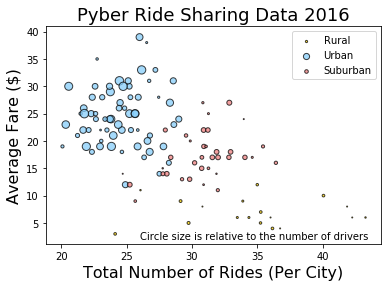

In [69]:
#create scatterplot with rural, suburban, and urban categories

rural = plt.scatter(x_axisr, y_axisr, marker="o", facecolors="gold", edgecolors="black",
            s=driver_countr, alpha=0.75)
urban = plt.scatter(x_axisu, y_axisu, marker="o", facecolors="lightskyblue", edgecolors="black",
            s=driver_countu, alpha=0.75)
suburban = plt.scatter(x_axiss, y_axiss, marker="o", facecolors="lightcoral", edgecolors="black",
            s=driver_counts, alpha=0.75)
plt.title('Pyber Ride Sharing Data 2016', fontsize=18)
plt.xlabel('Total Number of Rides (Per City)', fontsize=16)
plt.ylabel('Average Fare ($)', fontsize=16)

# Create a legend
plt.legend((rural, urban, suburban),
           ('Rural', 'Urban', 'Suburban'),
           scatterpoints=1,
           loc='best')

# Incorporate a text label regarding circle size
plt.text(26, 2, r'Circle size is relative to the number of drivers')
# Save Figure
plt.savefig("CityPyScatter.png")

#show plot
plt.show()

#Prepare Dataframes for Pie charts

In [ ]:
# % of Total Fares by City Type
# % of Total Rides by City Type
# % of Total Drivers by City Type

In [26]:
#sort by city type
mergecityride2_table_pd = mergecityride_table_pd.groupby(['type'], as_index=False)
print(mergecityride2_table_pd)

In [39]:
#make dataframe for % total fare by city type

fare_sum = mergecityride2_table_pd["fare"].sum()
#fare_sum

totalfaresum = fare_sum["fare"].sum()
#totalfaresum


fare_sum["fareperc"] = fare_sum["fare"]/totalfaresum * 100
fare_sum

,type,fare,fareperc
0,Rural,4327.93,6.811493
1,Suburban,19356.33,30.463872
2,Urban,39854.38,62.724635


In [40]:
#make dataframe for % total rides by city type

ride_sum = mergecityride2_table_pd["ride_id"].sum()
#fare_sum

totalridesum = ride_sum["ride_id"].sum()
#totalfaresum


ride_sum["rideperc"] = ride_sum["ride_id"]/totalridesum * 100
ride_sum

,type,ride_id,rideperc
0,Rural,580968240341287,5.005212
1,Suburban,3106884522576766,26.766722
2,Urban,7919412664056093,68.228066


In [43]:
#make dataframe for % total drivers by city type

drive_sum = mergecityride2_table_pd["driver_count"].sum()
#fare_sum

totaldrivesum = drive_sum["driver_count"].sum()
#totalfaresum


drive_sum["driveperc"] = drive_sum["driver_count"]/totaldrivesum * 100
drive_sum

,type,driver_count,driveperc
0,Rural,537,0.781557
1,Suburban,8570,12.472893
2,Urban,59602,86.745550


## % Total Drivers by City Type

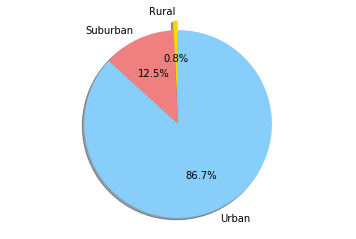

In [50]:
#Create Pie chart for % of total drivers by city type

# Build Pie Chart
types = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = drive_sum["driver_count"]

# The colors of each section of the pie chart
colors = ["gold", "lightcoral", "lightskyblue"]

explode = (0.1,0,0)

plt.pie(sizes, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

plt.savefig("DriverPyPie.png")
plt.show()


## Total Rides by City Type

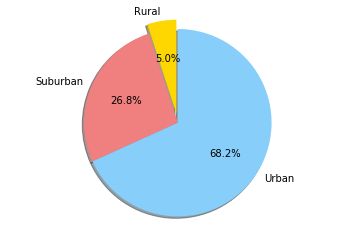

In [51]:
#Create Pie chart for % of total rides by city type

# Build Pie Chart
types = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = ride_sum["ride_id"]

# The colors of each section of the pie chart
colors = ["gold", "lightcoral", "lightskyblue"]

explode = (0.1,0,0)

plt.pie(sizes, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

plt.savefig("RidePyPie.png")
plt.show()

## Total Fare by City Type

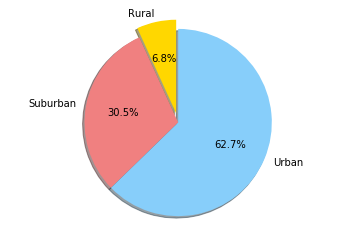

In [52]:
#Create Pie chart for % of total fare by city type

# Build Pie Chart
types = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = fare_sum["fare"]

# The colors of each section of the pie chart
colors = ["gold", "lightcoral", "lightskyblue"]

explode = (0.1,0,0)

plt.pie(sizes, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

plt.savefig("farePyPie.png")
plt.show()